#**EMPREENDEDORISMO E FORÇA DE TRABALHO FEMININO**



<center><img alt="gas" width="90%" src="https://images.pexels.com/photos/3184405/pexels-photo-3184405.jpeg?auto=compress&cs=tinysrgb&h=750&w=1260
"></center>




**Observação:**
> Os dados a serem analisados foram disponibilizados no [Kaggle]('https://kaggle.com/') e foram obtidos a partir do relatório Women Entrepreneurship Index e Global Entrepreneurship Index publicado em 2015. A pesquisa é limitada aos países da Organização para a Cooperação e Desenvolvimento Econômico (OCDE), onde todos os dados de 2015 estão disponíveis ao mesmo tempo no banco de dados.
---

## **Introdução**

Há muitos anos as mulheres vêm lutando para garantir uma condição e posição mais igualitária na sociedade e muito já foi alcançado nesse sentido, como a garantia do direito feminino ao voto, à educação, e a criação da Lei Maria da Penha, por exemplo. Porém, estamos longe de viver em um mundo ideal no que diz respeito à igualdade de gênero e isso fica bastante claro quando olhamos para determinados pontos e estimativas.

Segundo dados da ONU, uma a cada três mulheres no mundo inteiro já foi espancada ou vítima de violência sexual e o Brasil é o quinto país com o maior índice de casos de feminicídio no mundo. Estima-se também que em nosso país, uma denúncia de violência contra a mulher é realizada a cada 7 minutos e, destas, 70% são cometidas pelo parceiro da vítima.

E quando partimos para outros cenários, a situação também é complicada. Basta considerar o âmbito profissional, por exemplo. Quando pensamos que há pouco mais de 50 anos, mulheres casadas precisavam de autorização do marido para trabalhar, a situação que vivemos hoje parece fantástica. Porém, ela também está longe de ser a ideal.

No mercado de trabalho brasileiro, de forma geral, apesar do maior nível de escolaridade e de desempenhar as mesmas funções que os homens, as mulheres ainda recebem salários que podem ser até 50% menores. E se isso, por si só, já é absurdo, vale acrescentar que de acordo com uma projeção feita pelo Fórum Econômico Mundial, só haverá igualdade salarial no Brasil em aproximadamente 100 anos se o progresso atual for mantido.

Porém, apesar desse quadro, de todos os preconceitos e dificuldades que uma mulher enfrenta para avançar com sua carreira, cada vez mais, elas têm assumido posições de destaque no mercado de trabalho. Nesse sentido, um movimento que vem ganhando destaque e bastante força é o empreendedorismo feminino.

Fonte: [Sambatech]('https://sambatech.com/blog/insights/empreendedorismo-feminino/')

## **Objetivo**

O objetivo deste projeto é **analisar e buscar insights sobre a situação do empreendedorismo feminino no mundo no ano de 2015 para os países pertencentes à OCDE, confeccionando uma análise geoespacial baseada nos dados apresentados**, bem como buscar meios de melhor visualizar estes dados.

## **Análise Exploratória de Dados (EDA)**

###Procedimentos Preliminares

Vamos começar instalando e importando as bibliotecas necessárias para manusear as informações do dataset.

In [ ]:
#@title Instalando o GeoPandas
!pip install geopandas

In [2]:
#@title Importando bibliotecas necessárias
# Importando bibliotecas necessárias
from IPython.display import display, HTML # Funções de exibição
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_palette("colorblind") 
sns.set_style("darkgrid")

# Definir as opções de exibição do Pandas
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# Importar bibliotecas geoespaciais
import geopandas as gpd
from shapely.geometry import Point
from mpl_toolkits.axes_grid1 import make_axes_locatable

###Importando Dataset

Com as bibliotecas devidamente declaradas e prontas para o uso, vamos agora importar nosso dataset e fazer uma pré-visualização das informações presentes na sua estrutura.

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/engcivilgabriel/Analysis-of-public-data/master/CSV/Women%20Entrepreneurship%20and%20Labor%20Force.csv", sep=';',parse_dates=True)
df.head()

,No,Country,Level of development,European Union Membership,Currency,Women Entrepreneurship Index,Entrepreneurship Index,Inflation rate,Female Labor Force Participation Rate
0,4,Austria,Developed,Member,Euro,54.9,64.9,0.90,67.1
1,6,Belgium,Developed,Member,Euro,63.6,65.5,0.60,58.0
2,17,Estonia,Developed,Member,Euro,55.4,60.2,-0.88,68.5
3,18,Finland,Developed,Member,Euro,66.4,65.7,-0.20,67.7
4,19,France,Developed,Member,Euro,68.8,67.3,0.00,60.6


###Limpeza dos Dados

Com a pré-visualização do dataset, vamos agora entender suas características. Para isso, analisaremos as informações pertinentes às suas variáveis:

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 9 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   No                                     51 non-null     int64  
 1   Country                                51 non-null     object 
 2   Level of development                   51 non-null     object 
 3   European Union Membership              51 non-null     object 
 4   Currency                               51 non-null     object 
 5   Women Entrepreneurship Index           51 non-null     float64
 6   Entrepreneurship Index                 51 non-null     float64
 7   Inflation rate                         51 non-null     float64
 8   Female Labor Force Participation Rate  51 non-null     float64
dtypes: float64(4), int64(1), object(4)
memory usage: 3.7+ KB


Vemos que **o dataset apresenta 51 linhas e 9 colunas**, bem como não apresenta ausência de informações para nenhuma variável, o que é o ideal. Agora, através de uma olhada nos dados brutos fica evidente que, para uma melhor manipulação:

*   Os nomes das colunas deverão ser traduzidos para o idioma Português (BR)
*   Os nomes das colunas deverão ser limpos e padronizados; e,
*   Os dados deverão ser traduzidos para o idioma Português (BR).

In [5]:
# Traduzindo e formatando os nomes das colunas
df.columns = ["No", 
"País",
"Nível de desenvolvimento",
"Membro da União Europeia",
"Moeda",
"Índice de Empreendedorismo Feminino",
"Índice de Empreendedorismo",
"Taxa de inflação",
"Taxa de participação feminina na força de trabalho"]

In [6]:
# Traduzindo os nomes dos países
paises = {"Austria":"Austria", "Belgium":"Bélgica", "Estonia":"Estônia", "Finland":"Finlândia", "France":"França", "Germany":"Alemanha",
          "Greece":"Grécia", "Ireland":"Irlanda", "Italy":"Itália", "Latvia":"Letônia", "Lithuania":"Lituânia", "Netherlands":"Holanda",
          "Slovakia":"Eslováquia", "Slovenia":"Eslovênia", "Spain":"Espanha", "Croatia":"Croácia", "Denmark":"Dinamarca", "Hungary":"Hungria",
          "Poland":"Polônia", "Sweden":"Suécia", "Australia":"Austrália", "Iceland":"Islândia", "Japan":"Japão", "Norway":"Noruega",
          "Singapore":"Singapura", "Switzerland":"Suíça", "Taiwan":"Taiwan", "Algeria":"Argélia", "Argentina":"Argentina", "Bolivia":"Bolívia",
          "Bosnia and Herzegovina":"Bósnia e Hezergovina", "Brazil":"Brasil", "China":"China", "Costa Rica":"Costa Rica",
          "Ecuador":"Equador", "Egypt":"Egito", "El Salvador":"El Salvador", "Ghana":"Gana", "India":"índia",
          "Jamaica":"Jamaica", "Macedonia":"Macedônia", "Malaysia":"Malásia", "Mexico":"México", "Panama":"Panamá",
          "Peru":"Peru", "Russia":"Rússia", "Saudi Arabia":"Arábia Saudita", "Thailand":"Tailândia", "Tunisia":"Tunísia",
          "Turkey":"Turquia", "Uruguay":"Uruguai"}
df["País"] = df.País.map(paises)

# Traduzindo o Nível de desenvolvimento
desenvolvimento = {"Developed":"Desenvolvido", "Developing":"Em Desenvolvimento"}
df['Nível de desenvolvimento'] = df['Nível de desenvolvimento'].map(desenvolvimento)

# Traduzindo Membro da União Europeia
membro = {"Member":"Membro", "Not Member":"Não Membro"}
df['Membro da União Europeia'] = df['Membro da União Europeia'].map(membro)

# Traduzindo moeda
moeda = {"Euro":"Euro", "National Currency":"Moeda nacional"}
df['Moeda'] = df['Moeda'].map(moeda)

###Análise de Recursos

Após o processo de limpeza e preparação dos dados, entende-se que o dataset está pronto para serem feitas as análises de variável. Vamos iniciar então fazendo análises estatísticas superficiais das variáveis presentes no conjunto de dados. **Começaremos pelas variáveis categóricas**.

####Variáveis Categóricas

As variáveis categóricas são:

* País
* Nível de desenvolvimento
* Membro da União Européia
* Moeda

#####País

In [7]:
# Mostrar nomes e porcentagem de observações para cada país
df.País.value_counts(normalize=True)

Egito                   0.019608
Dinamarca               0.019608
Austrália               0.019608
Finlândia               0.019608
Bélgica                 0.019608
França                  0.019608
Japão                   0.019608
Singapura               0.019608
Equador                 0.019608
Noruega                 0.019608
Islândia                0.019608
Letônia                 0.019608
Itália                  0.019608
índia                   0.019608
El Salvador             0.019608
Grécia                  0.019608
Polônia                 0.019608
Suécia                  0.019608
Tailândia               0.019608
Bolívia                 0.019608
Irlanda                 0.019608
Arábia Saudita          0.019608
Croácia                 0.019608
Tunísia                 0.019608
Austria                 0.019608
Lituânia                0.019608
Jamaica                 0.019608
Turquia                 0.019608
Eslováquia              0.019608
Taiwan                  0.019608
Gana      

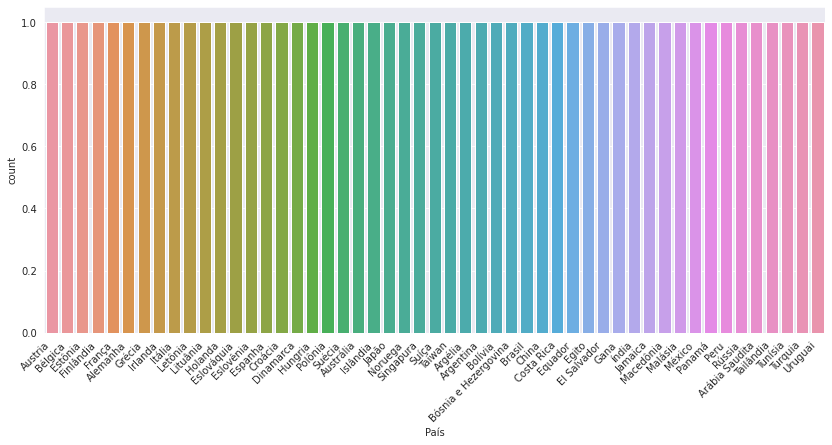

In [8]:
# Gráfico de contagem de observações por país
fig, ax = plt.subplots(figsize=(14,6))
plt.xticks(rotation=45, fontsize=10, ha='right')
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="País", data=df)

**Conclusão:** Verifica-se que todos os países apresentam um distribuição uniforme de dados.

#####Nível de desenvolvimento

In [9]:
# Mostrar nomes e porcentagem de observações para cada nível
df['Nível de desenvolvimento'].value_counts(normalize=True)

Desenvolvido          0.529412
Em Desenvolvimento    0.470588
Name: Nível de desenvolvimento, dtype: float64

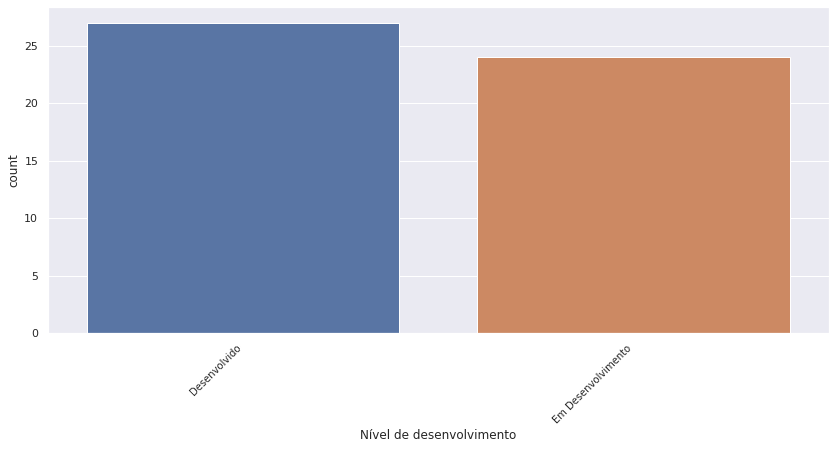

In [10]:
# Gráfico de contagem de observações por nível
fig, ax = plt.subplots(figsize=(14,6))
plt.xticks(rotation=45, fontsize=10, ha='right')
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="Nível de desenvolvimento", data=df)

**Conclusão:** Verifica-se que a maioria dos países estudados são desenvolvidos, isto é, 53%.

#####Membro da União Européia

In [11]:
# Mostrar nomes e porcentagem de observações para cada situação
df['Membro da União Europeia'].value_counts(normalize=True)

Não Membro    0.607843
Membro        0.392157
Name: Membro da União Europeia, dtype: float64

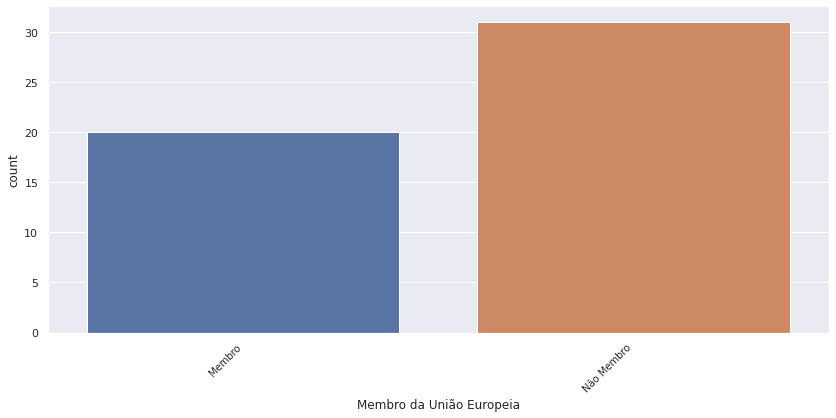

In [12]:
# Gráfico de contagem de observações por situação
fig, ax = plt.subplots(figsize=(14,6))
plt.xticks(rotation=45, fontsize=10, ha='right')
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="Membro da União Europeia", data=df)

**Conclusão:** Percebemos agora que a maioria dos países estudados são fazem parte da União Européia, isto é, 61%.

#####Moeda

In [13]:
# Mostrar nomes e porcentagem de observações para cada moeda
df['Moeda'].value_counts(normalize=True)

Moeda nacional    0.705882
Euro              0.294118
Name: Moeda, dtype: float64

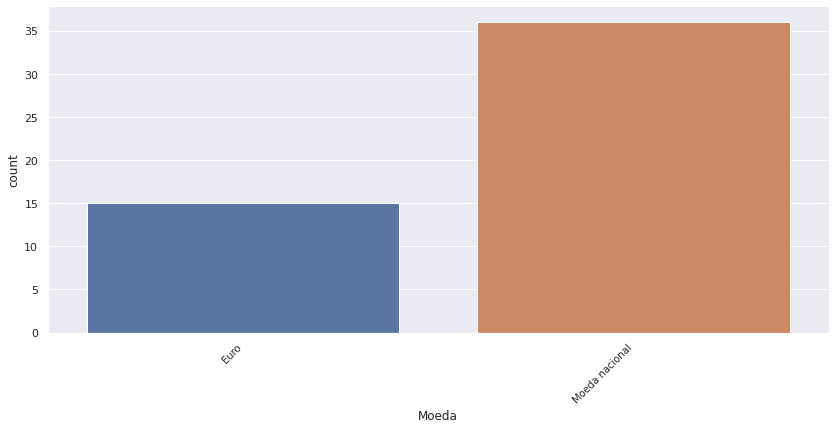

In [14]:
# Gráfico de contagem de observações por moeda
fig, ax = plt.subplots(figsize=(14,6))
plt.xticks(rotation=45, fontsize=10, ha='right')
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="Moeda", data=df)

**Conclusão:** Como se esperava, após a verificação dos países membros da União Européia, a maioria dos países estudados tem sua moeda nacional própria.

#####Curiosidades

A critério de curiosidade, vamos analisar quais países são membros da União Européia e quais não são, lembrando que o cenário remete ao ano de 2015.

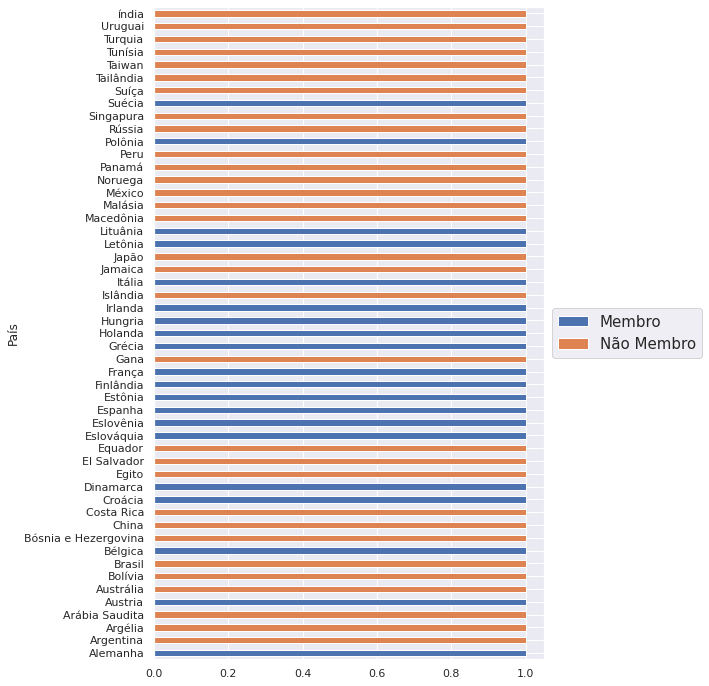

In [15]:
membro_por_país = df.groupby("País")["Membro da União Europeia"].value_counts().to_frame("Count").reset_index()
membro_por_país = membro_por_país.pivot("País", "Membro da União Europeia")
fig, ax = plt.subplots(figsize=(7,12))
membro_por_país.plot(kind="barh", stacked=True, ax=ax)
ax.legend(sorted(df['Membro da União Europeia'].unique().tolist()), loc='center left', bbox_to_anchor=(1, 0.5),prop={'size': 15});

Neste sentido e também a critério de curiosidade, vamos analisar agora como está a distribuição dos membros da UE de acordo com o nível de desenvolvimento.

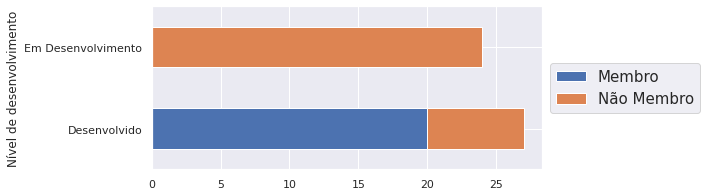

In [16]:
membro_por_país = df.groupby("Nível de desenvolvimento")["Membro da União Europeia"].value_counts().to_frame("Count").reset_index()
membro_por_país = membro_por_país.pivot("Nível de desenvolvimento", "Membro da União Europeia")
fig, ax = plt.subplots(figsize=(7,3))
membro_por_país.plot(kind="barh", stacked=True, ax=ax)
ax.legend(sorted(df['Membro da União Europeia'].unique().tolist()), loc='center left', bbox_to_anchor=(1, 0.5),prop={'size': 15});

Perfeito! Como se poderia se imaginar, a UE engloba todos os países desenvolvidos da OCDE, mas quais são os sete países desenvolvidos que não são membros da UE?

In [17]:
df.groupby(["Nível de desenvolvimento", "Membro da União Europeia"])["País"].unique()[1]

array(['Austrália', 'Islândia', 'Japão', 'Noruega', 'Singapura', 'Suíça',
       'Taiwan'], dtype=object)

Estes resultados levam também ao questionamento: Existem países com moedas próprias que são membros da UE? Se sim, quais são?

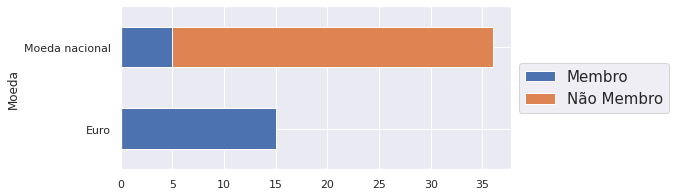

In [18]:
moeda_por_membro = df.groupby("Moeda")["Membro da União Europeia"].value_counts().to_frame("Count").reset_index()
moeda_por_membro = moeda_por_membro.pivot("Moeda", "Membro da União Europeia")
fig, ax = plt.subplots(figsize=(7,3))
moeda_por_membro.plot(kind="barh", stacked=True, ax=ax)
ax.legend(sorted(df['Membro da União Europeia'].unique().tolist()), loc='center left', bbox_to_anchor=(1, 0.5),prop={'size': 15});

In [19]:
df.groupby(["Moeda", "Membro da União Europeia"])["País"].unique()[1]

array(['Croácia', 'Dinamarca', 'Hungria', 'Polônia', 'Suécia'],
      dtype=object)

Por fim, vamos analisar agora qual a moeda adotada de acordo com o nível de desenvolvimento do país. Espera-se com os resultados aqui demonstrados, facilitar a visualização de informações sobre o empreendedorismo feminino no mundo e se existem tendências neste movimento.

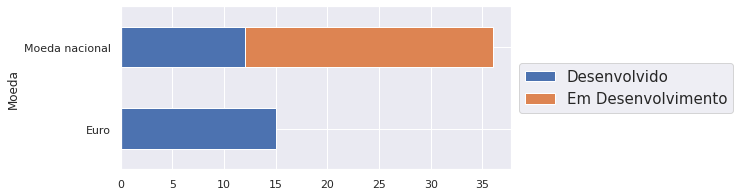

In [20]:
desenvolvimento_por_moeda = df.groupby("Moeda")["Nível de desenvolvimento"].value_counts().to_frame("Count").reset_index()
desenvolvimento_por_moeda = desenvolvimento_por_moeda.pivot("Moeda", "Nível de desenvolvimento")
fig, ax = plt.subplots(figsize=(7,3))
desenvolvimento_por_moeda.plot(kind="barh", stacked=True, ax=ax)
ax.legend(sorted(df['Nível de desenvolvimento'].unique().tolist()), loc='center left', bbox_to_anchor=(1, 0.5),prop={'size': 15});

In [21]:
df.groupby(["Moeda", "Nível de desenvolvimento"])["País"].unique()[1]

array(['Croácia', 'Dinamarca', 'Hungria', 'Polônia', 'Suécia',
       'Austrália', 'Islândia', 'Japão', 'Noruega', 'Singapura', 'Suíça',
       'Taiwan'], dtype=object)

**Conclusão:** Os países da OCDE que não são desenvolvidos,  têm moedas próprias e não são membros da UE!

####Variáveis Numéricas

Vamos agora, analisar as variáveis numéricas, são elas:

*   Índice de Empreendedorismo Feminino
*   Índice de Empreendedorismo
* Taxa de inflação
* Taxa de participação feminina na força de trabalho

#####Visão Geral

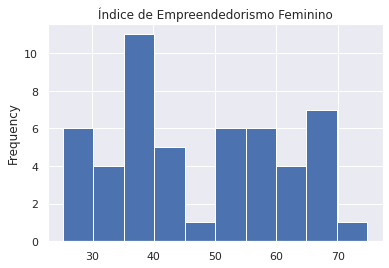

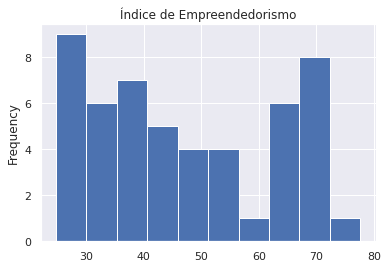

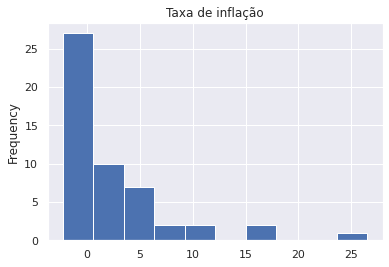

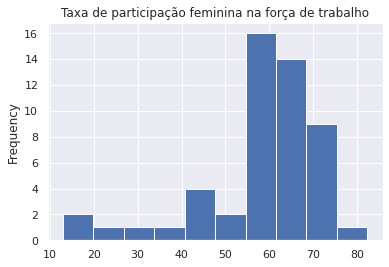

In [22]:
# variáveis numéricas
var_num = ['Índice de Empreendedorismo Feminino', 'Índice de Empreendedorismo', 
                'Taxa de inflação', 'Taxa de participação feminina na força de trabalho']

# gráficos
for v in var_num:
    df[v].plot(kind='hist')
    plt.title(v)
    plt.grid(1)
    plt.show()

In [23]:
# estatísticas resumidas
df[var_num].describe()

,Índice de Empreendedorismo Feminino,Índice de Empreendedorismo,Taxa de inflação,Taxa de participação feminina na força de trabalho
count,51.000000,51.000000,51.000000,51.000000
mean,47.835294,47.241176,2.587647,58.481765
std,14.268480,16.193149,5.380639,13.864567
min,25.300000,24.800000,-2.250000,13.000000
25%,36.350000,31.900000,-0.500000,55.800000
50%,44.500000,42.700000,0.600000,61.000000
75%,59.150000,65.400000,3.600000,67.400000
max,74.800000,77.600000,26.500000,82.300000


Dos histogramas plotados e da descrição estatística feita para as variáveis numéricas, fica evidente que os dados isoladamente se mostram consistentes e passiveis de aceitação, porém há a necessidade de se avaliar a correlação entre estas, buscando caminhos que possibilitem a correta análise dos dados. Deste modo, vamos confeccionar correlações iniciais entre as variáveis.

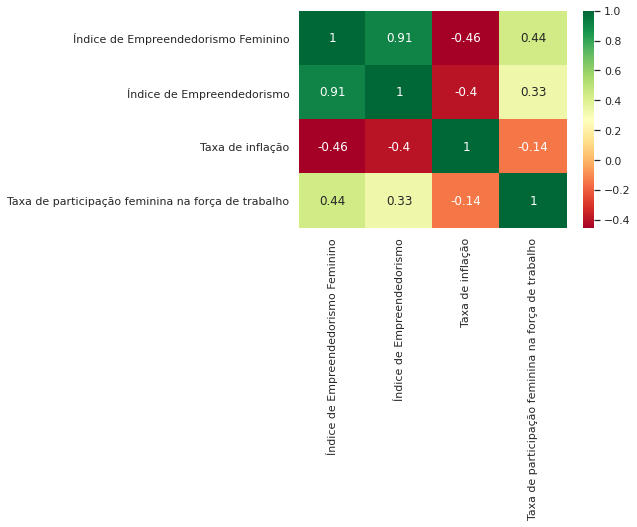

In [24]:
# matriz de correlação - Pearson
cor_pearson = df[var_num].corr(method='pearson')

sns.heatmap(cor_pearson, cmap=plt.cm.RdYlGn, annot=True)
plt.show()

A matriz de correlação é utilizada para iniciar a análise estatística dos dados históricos dos diversos universos estudados, identificando visualmente as variáveis envolvidas no estudo que se relacionam entre si. A determinação do grau de relação entre duas variáveis é dada pelo coeficiente de Pearson, também chamado de coeficiente de correlação, ou simplesmente correlação para os pares de variáveis. Esse coeficiente é um número entre -1 e 1 que expressa o grau de dependência linear entre duas variáveis quantitativas, que quando negativa indica que uma variável diminui com o aumento da outra, e positiva quando uma variável aumenta com o aumento da outra (JOHNSON; WICHERN, 2007).

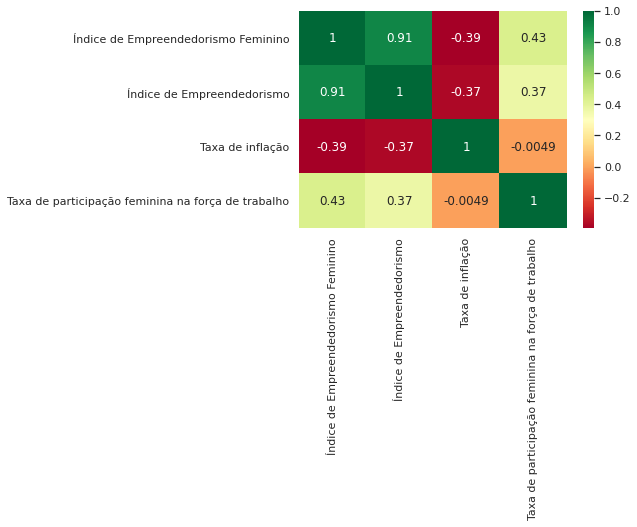

In [25]:
# matriz de correlação - Spearman (correlação de classificação)
cor_spearman = df[var_num].corr(method='spearman')

sns.heatmap(cor_spearman, cmap=plt.cm.RdYlGn, annot=True)
plt.show()

A correlação de Spearman entre duas variáveis é igual à correlação de Pearson entre os valores de postos daquelas duas variáveis. Contudo, enquanto a correlação de Pearson avalia relações lineares, a correlação de Spearman avalia relações monótonas, sejam elas lineares ou não. Se não houver valores de dados repetidos, uma correlação de Spearman perfeita de +1 ou -1 ocorre quando cada uma das variáveis é uma função monótona perfeita da outra.

Intuitivamente, a correlação de Spearman entre duas variáveis será alta quando observações tiverem uma classificação semelhante (ou idêntica no caso da correlação igual a 1) entre as duas variáveis, isto é, a posição relativa das observações no interior da variável (1º, 2º, 3º, etc.), e baixa quando observações tiverem uma classificação dessemelhante (ou completamente oposta no caso da correlação igual a -1) entre as duas variáveis.

**Fica claro assim que as variáveis que têm uma relação mais próxima são a do Índice de Empreendedorismo Feminino e Índice de Empreendedorismo. Por este motivo, vamos analisar mais de perto esta relação.**

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


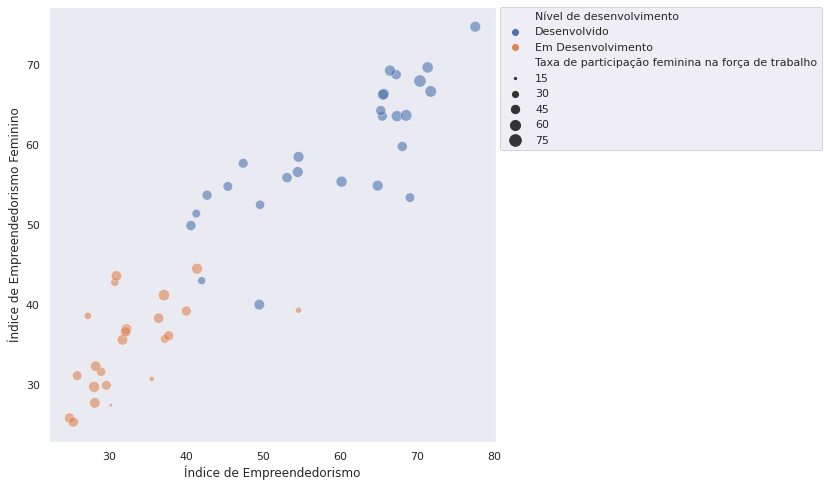

In [26]:
# 'Índice de Empreendedorismo Feminino' vs 'Índice de Empreendedorismo':
plt.rcParams['figure.figsize']=(8,8)
sns.scatterplot(df['Índice de Empreendedorismo'], df['Índice de Empreendedorismo Feminino'],
                hue = df['Nível de desenvolvimento'],
                size = df['Taxa de participação feminina na força de trabalho'],
                sizes = (1,150),
                alpha = 0.6)
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0) # move legenda fora da caixa
plt.grid()
plt.show();

**Conclusão:** Quanto mais desenvolvido o país, maior a participação feminina no mercado de trabalho e maior a sua contribuição com a força de trabalho nacional.

#####Empreendedorismo Feminino e a Inflação

Vamos agora analisar a inflação de diferentes países e sua relação com o Índice de Empreendedorismo Feminino.

In [27]:
import plotly.express as px
df=df.sort_values('Índice de Empreendedorismo Feminino',ascending=False)
fig=px.scatter(df,x='Índice de Empreendedorismo Feminino',y='Taxa de inflação',template='seaborn',trendline="ols",trendline_color_override="cyan")
fig.show()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



Olha que interessante, quanto maior é a segurança na economia nacional, isto é, quanto menor é a variação da inflação e quanto mais ela se encontra controlada, mais mulheres optam por iniciar seus próprios empreendimentos.

#####Efeito da força de trabalho feminina sobre a inflação

In [28]:
fig=px.scatter(df,x='Taxa de participação feminina na força de trabalho',y='Taxa de inflação',template='seaborn',trendline="ols",trendline_color_override="cyan")
fig.show()

Bem, podemos ver que a força de trabalho feminina tem apenas um pequeno impacto sobre a taxa de inflação.

**Conclusão:** Vimos até aqui que quanto mais estável a situação economica de um país, mais as mulheres buscam por oportunidade de empreender, bem como maior é o impacto da sua força de trabalho. Contudo, tal impacto não influencia consideravelmente a taxa de inflação, ou seja, o empreendedorismo feminino ainda não é suficiente para direcionar os rumos da economia nacional, demonstrando como as empresas mais influentes ainda são dominadas pelos homens.

###Análise Geoespacial

Analisando o Índice de Empreendedorismo Feminino do Mundo:

In [33]:
import plotly.graph_objects as go
df = pd.read_csv("https://raw.githubusercontent.com/engcivilgabriel/Analysis-of-public-data/master/CSV/Women%20Entrepreneurship%20and%20Labor%20Force.csv", sep=';',parse_dates=True)
fig = go.Figure(data=go.Choropleth(
    locations=df['Country'],
    z = df['Women Entrepreneurship Index'].astype(float),
    locationmode = 'country names',
    colorscale = 'sunsetdark',
    colorbar_title = 'IEF', 
))
fig.update_layout(
    title_text = 'Índice de Empreendedorismo Feminino 2015',
    geo_scope='world',
)
fig.show()

Para visualizar melhor como é a proporção entre o índice de empreendedorismo feminino e o índice de empreendedorismo para cada país, vamos então criar uma coluna para tal relação :

In [37]:
df['Proporção']=[df['Women Entrepreneurship Index'].values[i]/df['Entrepreneurship Index'].values[i] for i in range(len(df))]

In [39]:
fig = go.Figure(data=go.Choropleth(
    locations=df['Country'],
    z = df['Proporção'].astype(float),
    locationmode = 'country names',
    colorscale = 'sunsetdark',
    colorbar_title = "IEF/IE",  
))
fig.update_layout(
    title_text = 'Proporção de Empreendedorismo entre Gêneros de 2015',
    geo_scope='world',
)
fig.show()

A partir disso, podemos ver que a alguns países, como a Índia por exemplo, demonstram ter uma proporção mais igualitária de empreendedorismo entre gêneros, o que significa que trata homens e mulheres como iguais e dá a homens e mulheres a mesma quantidade de oportunidades de empreendedorismo. É interessante notar que a Austrália, que se mostrava despontando nos índices de empreendedorismo feminino, apresenta uma proporção igualitária entre gêneros, o que demonstra ser um país de muitas oportunidades para todos.

Todavia, tão interessante quanto, é perceber como países da América Central e Latina, como o México por exemplo, mostram mais atenção às mulheres do país e lhes oferecem mais oportunidades de empreendedorismo do que outros países.

##**Conclusão Geral**

As lideranças femininas têm ainda grande potencial transformador dentro das empresas, oxigenando o mercado, diversificando os pontos de vista na tomada de decisões e dando mais visibilidade para questões de gênero no cotidiano de colegas de equipe ou mesmo na relação cliente/prestador de serviço. 

Em outras palavras, é o empoderamento nos ambientes de trabalho. E mulheres realizadas à frente dos seus negócios são a inspiração para outras que têm sua confiança e autoestima fragilizadas quando a conquista da independência financeira não parece tão fácil. Ao se tornarem protagonistas de suas vidas, elas conseguem se libertar de ciclos viciosos de violência doméstica e normalmente reinvestem o capital adquirido na própria família, trazendo benefícios para toda a sociedade.

É possível falar ainda em melhorias econômicas globais: há poucos anos, um estudo do McKinsey Global Institute trazido a público pela Revista Exame projetou o impacto financeiro de um cenário com participação plena das mulheres no mundo dos negócios: os ganhos no PIB mundial chegariam a US$ 28 trilhões até 2025.

Para transformações no quadro atual, o apoio e o incentivo para que novas empreendedoras formalizem seus negócios, tornando-os sustentáveis, são bons catalisadores. Um primeiro passo é elas se tornarem MEIs, o que traz várias vantagens no planejamento das atividades, sem contar fatores de estabilidade como auxílios para seguir com rendimentos durante a gestação e primeiros meses de maternidade, auxílio-doença, previdência e outros. Depois, com a empresa estabelecida e crescendo, é possível dar passos maiores, como transformar o negócio em uma microempresa e até mais.

Fonte: [SEBRAE]('https://sebraers.com.br/momento-da-empresa/empreendedorismo-feminino-crescimento-e-geracao-de-renda-que-transformam-a-realidade/')